# Logistic Regression
* Transforming Linear regression to logistic regression
* Mathematical theory behind logistic regression
* Simple implementation of logistic regression for classification problem 

* Logistic Regression works by transforming a Linear Regression into a classification model through the use of the logistic sigmoid function.
* The logistic sigmoid function is defined as:
$f(x) = \frac{1}{1 + e^{-x}}$

## Transforming Linear regression to logistic regression
* Let's explore how to convert a Linear Regression model used for regression task into a Logistic Regression model used for a classification tasks. 
* Imagine a dataset with a single feature (previous year's income) and a single target label (load default). 

* Logistic regression uses maximum likelihood to find the best fitting  model.

## Logistic Regression Model

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from holoviews.plotting.bokeh.styles import alpha

In [2]:
df = pd.read_csv("data/hearing_test.csv")

In [3]:
df.head()

,age,physical_score,test_result
0,33.0,40.7,1
1,50.0,37.2,1
2,52.0,24.7,0
3,56.0,31.0,0
4,35.0,42.9,1


In [4]:
df.describe()

,age,physical_score,test_result
count,5000.000000,5000.000000,5000.000000
mean,51.609000,32.760260,0.600000
std,11.287001,8.169802,0.489947
min,18.000000,-0.000000,0.000000
25%,43.000000,26.700000,0.000000
50%,51.000000,35.300000,1.000000
75%,60.000000,38.900000,1.000000
max,90.000000,50.000000,1.000000


In [5]:
df['test_result'].value_counts()

test_result
1    3000
0    2000
Name: count, dtype: int64

<Axes: xlabel='test_result', ylabel='count'>

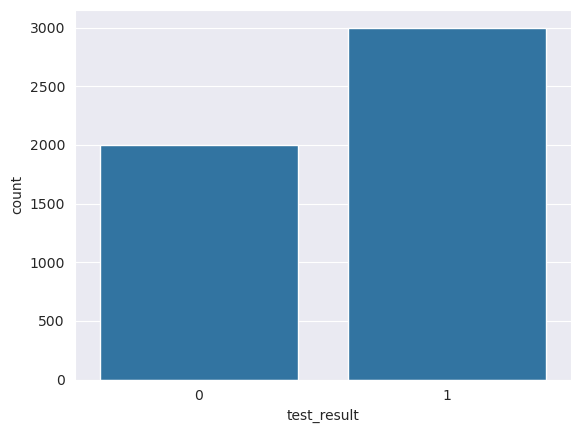

In [6]:
sns.countplot(x='test_result', data=df)

<Axes: xlabel='test_result', ylabel='age'>

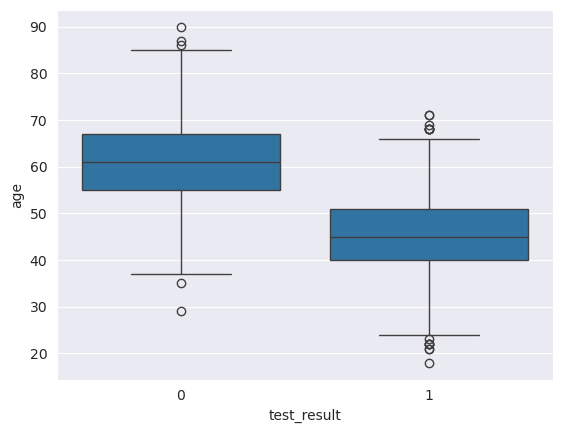

In [7]:
sns.boxplot(x='test_result', y='age', data=df)

<Axes: xlabel='age', ylabel='physical_score'>

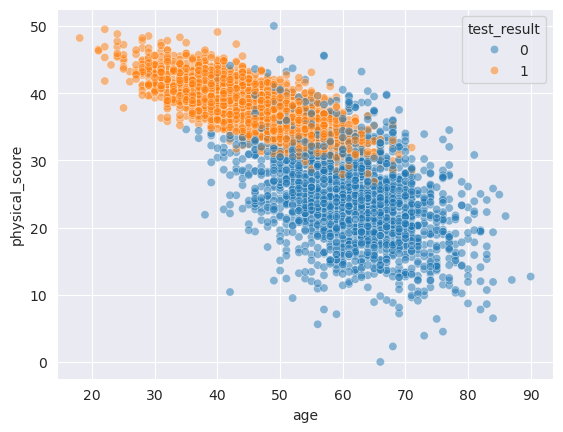

In [11]:
sns.scatterplot(x='age', y='physical_score', data=df, hue='test_result', alpha=0.5)

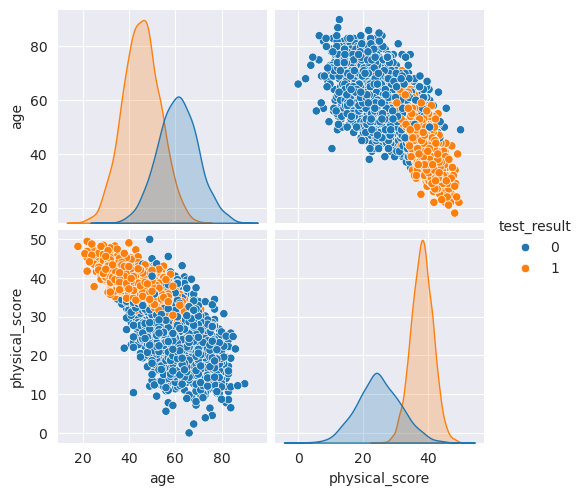

In [12]:
sns.pairplot(df, hue='test_result')

<Axes: >

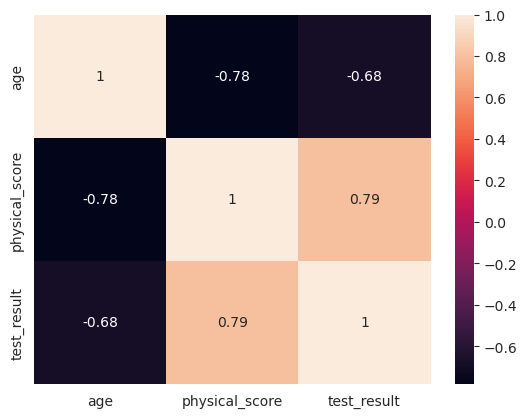

In [13]:
sns.heatmap(df.corr(), annot=True)

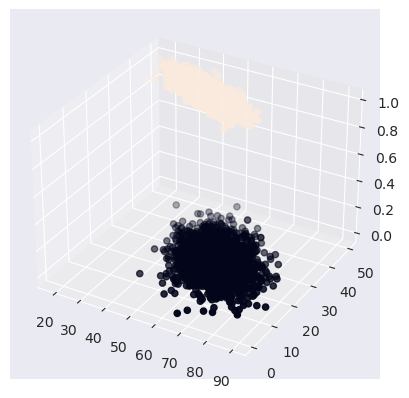

In [15]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(df['age'], df['physical_score'], df['test_result'], c=df['test_result'])

In [16]:
X = df[['age', 'physical_score']]
y = df['test_result']

In [17]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=101)

scaler = StandardScaler()

In [18]:
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

In [19]:
from sklearn.linear_model import LogisticRegression

log_model = LogisticRegression()

log_model.fit(scaled_X_train, y_train)

LogisticRegression()

In [20]:
log_model.coef_

array([[-0.95017725,  3.46148946]])

In [21]:
y_pred = log_model.predict_proba(scaled_X_test)

In [22]:
y_pred

array([[2.38051656e-02, 9.76194834e-01],
       [2.68854070e-02, 9.73114593e-01],
       [9.89220033e-01, 1.07799673e-02],
       [1.90238747e-03, 9.98097613e-01],
       [9.75065740e-01, 2.49342602e-02],
       [9.89676918e-01, 1.03230822e-02],
       [7.39558885e-02, 9.26044112e-01],
       [1.70641117e-02, 9.82935888e-01],
       [9.97075399e-01, 2.92460122e-03],
       [3.30092529e-02, 9.66990747e-01],
       [8.30393770e-02, 9.16960623e-01],
       [9.90796129e-03, 9.90092039e-01],
       [7.07374696e-03, 9.92926253e-01],
       [9.34320413e-01, 6.56795867e-02],
       [1.16096233e-04, 9.99883904e-01],
       [6.58212248e-02, 9.34178775e-01],
       [9.89155494e-01, 1.08445064e-02],
       [2.79291486e-03, 9.97207085e-01],
       [5.57001286e-04, 9.99442999e-01],
       [9.96534179e-01, 3.46582117e-03],
       [8.81902000e-01, 1.18098000e-01],
       [1.30963044e-01, 8.69036956e-01],
       [5.45789772e-01, 4.54210228e-01],
       [3.43636758e-02, 9.65636324e-01],
       [3.984685